**Аналитическая задача** — провести анализ данных с целью выделения портретов заемщиков по каждой группе целевого признака.

**Примерный план исследования**

Шаг 1. Загрузка данных;

Шаг 2. Первичная обработка данных (при необходимости):
- скорректировать заголовки;
- скорректировать типы признаков;
- проверить наличие дублирующихся записей;
- проверить наличие аномальных значений;
- восстановить пропущенные значения;

Шаг 3. Добавление новых признаков:
- для каждого клиента рассчитайте его возраст на настоящий момент времени (на 2022 год);

Шаг 4. Исследовательский анализ данных
- в разрезе значений целевого признака (`Дисциплина клиентов без просрочки по кредиту`) исследовать распределения числовых и категориальных признаков;
- в разрезе значений целевого признака составить портреты клиентов платежной системы.

In [20]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# 1. Загрузка данных и их изучение

In [21]:
df = pd.read_csv('/content/dataset_segment_bank.csv')
df.head(3)

,Идентификатор,Дата рождения,Дисциплина клиентов без просрочки по кредиту,Количество переводов,Тип переводов,География переводов,География телефона,Сумма перевода,Максимальная сумма перевода,Средняя сумма перевода,Полная сумма перевода,"Канал, через который пришел клиент",Оператор связи,Пол
0,1493553,1981-05-08,BAD,17.0,2.0,77.0,77.0,371600.0,265000.0,21858.8235,371600.0,Стойка,NaN,Ж
1,8130758,1979-03-06,BAD,4.0,2.0,77.0,77.0,137574.0,135000.0,34393.5000,137574.0,Стойка,NaN,М
2,1782539,1957-04-29,BAD,3.0,2.0,77.0,77.0,175150.0,135000.0,58383.3333,175150.0,Стойка,МегаФон,М


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50224 entries, 0 to 50223
Data columns (total 14 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Идентификатор                                 50224 non-null  int64  
 1   Дата рождения                                 50224 non-null  object 
 2   Дисциплина клиентов без просрочки по кредиту  50223 non-null  object 
 3   Количество переводов                          50158 non-null  float64
 4   Тип переводов                                 50191 non-null  float64
 5   География переводов                           50191 non-null  float64
 6   География телефона                            48324 non-null  float64
 7   Сумма перевода                                50158 non-null  float64
 8   Максимальная сумма перевода                   50158 non-null  float64
 9   Средняя сумма перевода                        50158 non-null 

In [23]:
df.describe()

,Идентификатор,Количество переводов,Тип переводов,География переводов,География телефона,Сумма перевода,Максимальная сумма перевода,Средняя сумма перевода,Полная сумма перевода
count,5.022400e+04,50158.000000,50191.000000,50191.000000,48324.000000,5.015800e+04,5.015800e+04,50158.000000,5.015800e+04
mean,1.097869e+07,17.290821,13.186328,110.217888,58.161183,2.995784e+05,1.676934e+05,34478.895504,2.995784e+05
std,5.760869e+06,34.801316,22.298265,4969.776700,22.708184,4.527366e+05,1.410307e+05,43548.644155,4.527366e+05
min,1.400402e+06,1.000000,-1.000000,0.000000,0.000000,3.000000e+01,3.000000e+01,30.000000,3.000000e+01
25%,6.397864e+06,4.000000,2.000000,48.000000,40.000000,9.225300e+04,5.500000e+04,10108.333300,9.225300e+04
50%,1.133596e+07,9.000000,5.000000,73.000000,66.000000,1.877303e+05,1.200000e+05,19831.931800,1.877303e+05
75%,1.444163e+07,18.000000,6.000000,77.000000,77.000000,3.831000e+05,2.350000e+05,41650.750000,3.831000e+05
max,3.006527e+07,2220.000000,69.000000,498002.000000,78.000000,1.953691e+07,2.150000e+06,644225.000000,1.953691e+07


# 2. Первичная обработка данных

2.1 Корректировка заголовков

In [24]:
df.columns = ['Идентификатор', 'Дата рождения',
       'Дисциплина клиента', 'Количество переводов',
       'Тип переводов', 'География переводов', 'География телефона',
       'Сумма перевода', 'Максимальная сумма перевода',
       'Средняя сумма перевода', 'Полная сумма перевода',
       'Канал клиента', 'Оператор связи', 'Пол']
df.columns = df.columns.str.lower()

2.2 Корректировка типов признаков

In [25]:
#скорректировать типы признаков: 'дата рождения', 'география переводов' и 'география телефона'

df = df.astype({'дата рождения': 'datetime64'})
df = df.astype({'география переводов': 'object'})
df = df.astype({'география телефона': 'object'})

In [26]:
# проверка
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50224 entries, 0 to 50223
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   идентификатор                50224 non-null  int64         
 1   дата рождения                50224 non-null  datetime64[ns]
 2   дисциплина клиента           50223 non-null  object        
 3   количество переводов         50158 non-null  float64       
 4   тип переводов                50191 non-null  float64       
 5   география переводов          50191 non-null  object        
 6   география телефона           48324 non-null  object        
 7   сумма перевода               50158 non-null  float64       
 8   максимальная сумма перевода  50158 non-null  float64       
 9   средняя сумма перевода       50158 non-null  float64       
 10  полная сумма перевода        50158 non-null  float64       
 11  канал клиента                50193 non-nu

2.3 Проверка дублирующихся записей

In [27]:
print(f"""Количество дублирующихся записей равняется {df.duplicated().sum()},
что составляет {df.duplicated().sum()/df.shape[0]:.2%}.""")

Количество дублирующихся записей равняется 575,
что составляет 1.14%.


In [28]:
# удаление дублей
df.drop_duplicates(keep='first', inplace = True)

In [29]:
# удаление повторяющегося столбца 'полная сумма перевода'
df.drop(columns = ['полная сумма перевода'], inplace=True)

In [31]:
# проверка
df.columns

Index(['идентификатор', 'дата рождения', 'дисциплина клиента',
       'количество переводов', 'тип переводов', 'география переводов',
       'география телефона', 'сумма перевода', 'максимальная сумма перевода',
       'средняя сумма перевода', 'канал клиента', 'оператор связи', 'пол'],
      dtype='object')

2.4 Проверка аномальных значений

In [32]:
# нерперывные признаки:
vars_cont = ['количество переводов', 'сумма перевода',
             'максимальная сумма перевода']

#категориальные признаки:
vars_cat = ['дисциплина клиента', 'география переводов', 'география телефона',
            'канал клиента', 'оператор связи', 'пол', 'тип переводов']

Работа с категориальными признаками

In [33]:
# просмотр уникальных значений признаков и их распределение
for col in vars_cat:
    print(f'---- начало признака {col} ----')
    print(df[col].value_counts())
    print(f'---- конец признака {col} ----')
    print()

---- начало признака дисциплина клиента ----
GOOD      26852
MIDDLE    13577
BAD        9219
Name: дисциплина клиента, dtype: int64
---- конец признака дисциплина клиента ----

---- начало признака география переводов ----
77.0        19144
78.0         4140
61.0         2338
23.0         2113
66.0         1502
            ...  
75.0            2
498001.0        2
6.0             1
20.0            1
19.0            1
Name: география переводов, Length: 74, dtype: int64
---- конец признака география переводов ----

---- начало признака география телефона ----
77.0    13610
78.0     5468
23.0     2457
61.0     2266
66.0     1638
        ...  
0.0         2
25.0        1
38.0        1
75.0        1
14.0        1
Name: география телефона, Length: 64, dtype: int64
---- конец признака география телефона ----

---- начало признака канал клиента ----
Офис       24876
Партнер    20560
Стойка      4182
Name: канал клиента, dtype: int64
---- конец признака канал клиента ----

---- начало признака 

Исследую отдельно признаки:

- `оператор связи`,
- `география переводов`,
- `география телефона`,
- `тип переводов`.

In [34]:
# 'оператор связи'

# словарь для замены
dict_replace = {'оператор связи': {'Мобильные ТелеСистемы': 'МТС',
                                   'МобильныеТелеСистемы': 'МТС',
                                   'Ниж-ская сот.связь': 'Нижегородская сотовая связь'}}

# замена значений
df.replace(dict_replace, inplace = True)

In [38]:
df['оператор связи'].value_counts().sort_index()

Адыгейская сотовая связь                                  1
Архангельские Мобильные Сети                              1
Астарта                                                   3
Астрахань GSM                                             7
Байкалвестком                                             2
Белгородская Сотовая Связь                               43
Беспровод. инф. технологи                                 1
Волгоград-GSM                                           142
Вотек Мобайл                                            922
Вымпел-Коммуникации                                   13463
Дельта Телеком                                           25
ЕКАТЕРИНБУРГ-2000                                       601
Енисейтелеком                                             4
Кемеровская Мобильная Связь                             361
Кодотел                                                   2
Курская Сотовая Связь                                     4
Липецк Мобайл                           

In [39]:
df['география переводов'].value_counts().head(60)

77.0    19144
78.0     4140
61.0     2338
23.0     2113
66.0     1502
2.0      1298
63.0     1246
62.0     1202
40.0     1105
26.0     1102
64.0      994
74.0      980
47.0      908
10.0      764
56.0      759
34.0      744
52.0      707
71.0      704
59.0      647
16.0      627
42.0      565
73.0      523
36.0      382
54.0      370
39.0      336
13.0      310
43.0      282
37.0      261
58.0      259
55.0      254
18.0      253
69.0      237
35.0      220
76.0      219
33.0      211
53.0      198
48.0      192
44.0      188
72.0      180
0.0       178
51.0      174
30.0      150
68.0      115
31.0       98
21.0       93
60.0       93
12.0       66
86.0       25
24.0       16
46.0       16
45.0       14
1.0        13
7.0        12
89.0       10
5.0        10
29.0        9
15.0        8
9.0         6
8.0         6
25.0        5
Name: география переводов, dtype: int64

In [40]:
df['география телефона'].value_counts().head(60)

77.0    13610
78.0     5468
23.0     2457
61.0     2266
66.0     1638
2.0      1511
63.0     1410
26.0     1241
74.0     1166
64.0     1135
40.0     1099
62.0     1060
34.0      954
71.0      848
52.0      844
56.0      831
16.0      810
10.0      797
59.0      750
42.0      690
73.0      639
36.0      521
54.0      444
39.0      381
13.0      349
43.0      327
37.0      320
55.0      319
18.0      306
58.0      300
69.0      296
48.0      266
76.0      256
33.0      255
72.0      253
35.0      246
53.0      231
44.0      226
30.0      211
51.0      185
60.0      179
68.0      156
20.0      137
31.0      112
12.0       82
1.0        40
46.0       20
7.0        19
32.0       18
45.0       18
5.0        17
15.0       15
9.0        12
8.0        10
57.0        7
67.0        6
70.0        4
24.0        4
29.0        3
0.0         2
Name: география телефона, dtype: int64

Работа с непрерывными признаками

In [41]:
# 2 линии нижнего и верхнего усов
#для подсчета значений нижнего и верхнего усов была предложена следующая функция
def calc_boxplot(df_col : pd.Series) -> tuple:

    """
    Функция для расчета значений нижнего и верхнего усов.
    На вход подается столбец датафрейма,
    на выходе кортеж: первый элемент -- нижний ус, второй элемент -- верхний ус
    """

    Q1, median, Q3 = np.percentile(np.asarray(df_col.dropna()), [25, 50, 75])
    IQR = Q3 - Q1
    loval = Q1 - 1.5 * IQR
    hival = Q3 + 1.5 * IQR
    wiskhi = np.compress(np.asarray(df_col.dropna()) <= hival, np.asarray(df_col.dropna()))
    wisklo = np.compress(np.asarray(df_col.dropna()) >= loval, np.asarray(df_col.dropna()))
    actual_hival = np.max(wiskhi)
    actual_loval = np.min(wisklo)
    return actual_loval, actual_hival #(нижний ус, верхний ус)

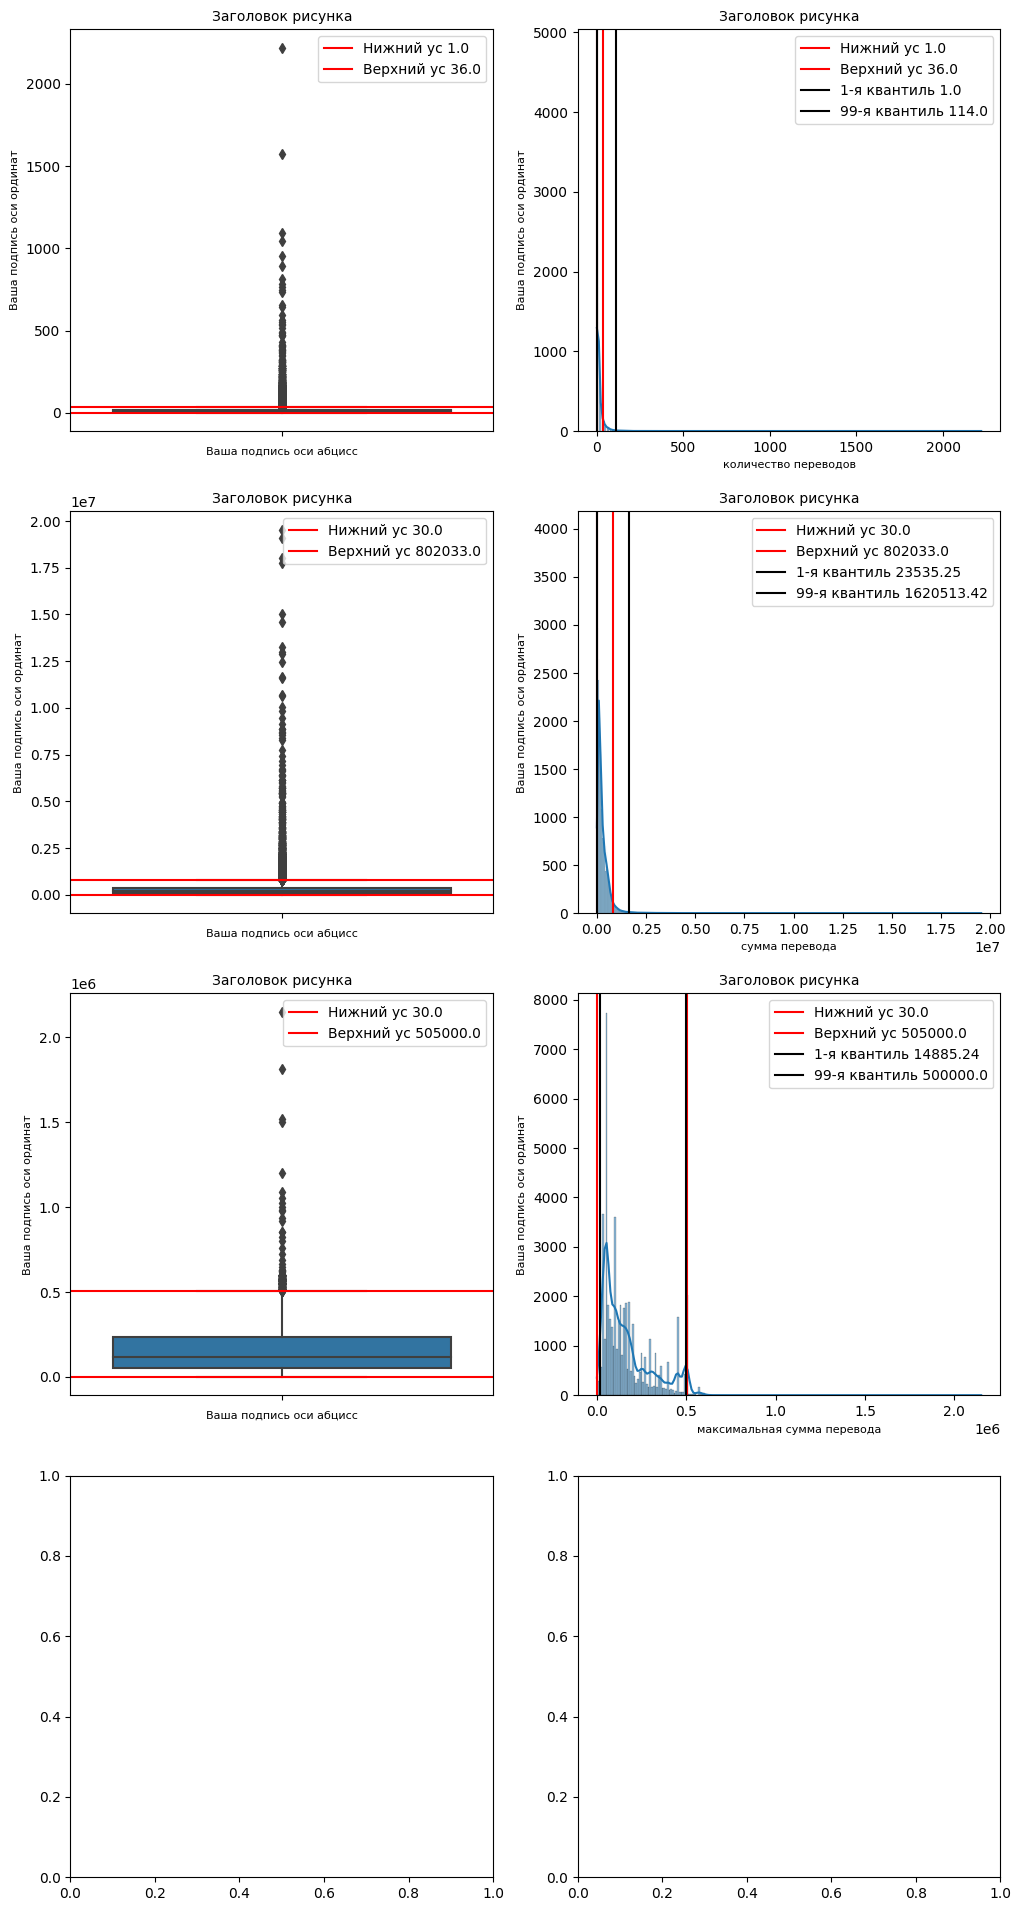

In [42]:
# линии квантилей, усов и мод - рисуем на плотности, они будут вертикальными

#для расчета квантилей воспользуемся методом np.percentile

fig, ax = plt.subplots(4, 2, figsize = (12, 24)) # задаем сетку 4 на 2 -- 8 графиков

for index, col in enumerate(vars_cont): #перебираем в цикле заголовки признаков `col` и сразу же генерируем номер рисунка `index`
    plt.subplot(4, 2, 2*index + 1) #задаем рисунок с нужным нечетным номером (нумерация начинается с 1)
    ax = sns.boxplot(y = df[col]) #рисуем ящик
    plt.title('Заголовок рисунка', fontsize = 10) #заголовок рисунка
    plt.ylabel('Ваша подпись оси ординат', fontsize = 8) #подпись оси ординат
    plt.xlabel('Ваша подпись оси абцисс', fontsize = 8) #подпись оси абцисс
    value_low, value_upper = calc_boxplot(df[col])
    plt.axhline(value_low, #значение координаты по оси ординат -- горизонтальная линия имеет координаты (0, value_low)
                color = 'red', # цвет линии
                label = 'Нижний ус {}'.format(np.round(value_low,2)) #текст для легенды -- отображаем значение уса, округленное до 2 знаков
                )
    plt.axhline(value_upper, #значение координаты по оси ординат -- горизонтальная линия имеет координаты (0, value_upper)
                color = 'red', # цвет линии
                label = 'Верхний ус {}'.format(np.round(value_upper,2)) #текст для легенды -- отображаем значение уса, округленное до 2 знаков
                )

    plt.legend(loc='upper right') #отображаем легенду, принудительно размещая ее в правом верхнем углу

    #четные рисунки -- рисуем гистограммы и плотности
    plt.subplot(4, 2, 2*index + 2)
    ax = sns.histplot(df[col], #признак
                      kde = True #для рисования функции плотности
                      )
    ax.set_xlabel(col)

    #ИЗМЕНЕНИЯ ТУТ
    #вначале рисуем усы на плотности в виде вертикальных линий -- метод axvline()

    value_low, value_upper = calc_boxplot(df[col])
    plt.axvline(value_low, #значение координаты по оси ординат -- горизонтальная линия имеет координаты (0, value_low)
                color = 'red', # цвет линии
                label = 'Нижний ус {}'.format(np.round(value_low,2)) #текст для легенды -- отображаем значение уса, округленное до 2 знаков
                )
    plt.axvline(value_upper, #значение координаты по оси ординат -- горизонтальная линия имеет координаты (0, value_upper)
                color = 'red', # цвет линии
                label = 'Верхний ус {}'.format(np.round(value_upper,2)) #текст для легенды -- отображаем значение уса, округленное до 2 знаков
                )

    plt.legend(loc='upper right') #отображаем легенду, принудительно размещая ее в правом верхнем углу

    #рисуем квантили
    #вначале считаем 1 и 99 квантили
    per_1 = np.percentile(df[col].dropna(), 1)
    per_99 = np.percentile(df[col].dropna(), 99)

    plt.axvline(per_1, #значение координаты по оси ординат -- вертикальная линия имеет координаты (0, per_1)
                color = 'black', # цвет линии
                label = '1-я квантиль {}'.format(np.round(per_1,2)) #текст для легенды -- отображаем значение квантиля, округленное до 2 знаков
                )
    plt.axvline(per_99, #значение координаты по оси абцисс -- вертикальная линия имеет координаты (0, per_99)
                color = 'black', # цвет линии
                label = '99-я квантиль {}'.format(np.round(per_99,2)) #текст для легенды -- отображаем значение квантиля, округленное до 2 знаков
                )

    #для каждого признака рисуем МОДУ
    plt.legend(loc='upper right') #отображаем легенду, принудительно размещая ее в правом верхнем углу
    #КОНЕЦ ИЗМЕНЕНИЙ
    plt.title('Заголовок рисунка', fontsize = 10) #заголовок рисунка
    plt.ylabel('Ваша подпись оси ординат', fontsize = 8) #подпись оси ординат
    plt.xlabel(col, fontsize = 8) #подпись оси абцисс

In [44]:
# фильтр на аномальные значения по интервальным признакам
filter_no_anomals = ((df['количество переводов'].between(min(df['количество переводов']), 114))
                 & ((df['сумма перевода'].between(min(df['сумма перевода']),
                                                 np.percentile(df['сумма перевода'].dropna(), 99))))
                 & (df['максимальная сумма перевода'].between(min(df['максимальная сумма перевода']),
                                                 np.percentile(df['максимальная сумма перевода'].dropna(), 99)))
)

print(f'Потеряно {(1-df.loc[filter_no_anomals].shape[0] / df.shape[0]):.2%} данных')


Потеряно 2.53% данных


In [48]:
# обработка аномалий на основе меток строк

df_no_anomals = df.loc[filter_no_anomals];

2.5 Восстановление пропущенных значений

In [49]:
# сумма пропусков

df_no_anomals.isna().sum()

идентификатор                     0
дата рождения                     0
дисциплина клиента                1
количество переводов              0
тип переводов                     0
география переводов               0
география телефона             1797
сумма перевода                    0
максимальная сумма перевода       0
средняя сумма перевода            0
канал клиента                    24
оператор связи                  633
пол                               7
dtype: int64

In [50]:
# заполнение пропусков
values = {"география телефона": "не указана", "оператор связи": "не указан"}
df_no_anomals.fillna(value=values, inplace = True)

<ipython-input-50-4d3354abb747>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_anomals.fillna(value=values, inplace = True)


In [51]:
df_no_anomals.dropna(inplace = True)

<ipython-input-51-600853af5fc1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_anomals.dropna(inplace = True)


In [52]:
# полученый результат
df_no_anomals

,идентификатор,дата рождения,дисциплина клиента,количество переводов,тип переводов,география переводов,география телефона,сумма перевода,максимальная сумма перевода,средняя сумма перевода,канал клиента,оператор связи,пол
0,1493553,1981-05-08,BAD,17.0,2.0,77.0,77.0,371600.00,265000.0,21858.8235,Стойка,не указан,Ж
1,8130758,1979-03-06,BAD,4.0,2.0,77.0,77.0,137574.00,135000.0,34393.5000,Стойка,не указан,М
2,1782539,1957-04-29,BAD,3.0,2.0,77.0,77.0,175150.00,135000.0,58383.3333,Стойка,МегаФон,М
3,12410720,1977-08-05,BAD,3.0,2.0,77.0,77.0,50250.00,50000.0,16750.0000,Стойка,не указан,М
4,21309736,1978-08-15,GOOD,5.0,69.0,77.0,77.0,215920.14,135000.0,43184.0280,Стойка,не указан,М
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49759,3653998,1982-12-08,MIDDLE,112.0,16.0,77.0,77.0,761065.34,384000.0,6795.2262,Офис,МегаФон,Ж
49762,7375286,1955-09-07,MIDDLE,111.0,0.0,77.0,78.0,334021.00,50000.0,3009.1981,Офис,МТС,Ж
49772,23846951,1965-03-18,GOOD,114.0,2.0,77.0,77.0,741352.48,93000.0,6503.0919,Офис,МегаФон,Ж
49773,23674209,1973-01-23,GOOD,114.0,0.0,77.0,77.0,1031800.00,195000.0,9050.8771,Офис,МегаФон,М


In [53]:
# для сравнения
df.head(2)

,идентификатор,дата рождения,дисциплина клиента,количество переводов,тип переводов,география переводов,география телефона,сумма перевода,максимальная сумма перевода,средняя сумма перевода,канал клиента,оператор связи,пол
0,1493553,1981-05-08,BAD,17.0,2.0,77.0,77.0,371600.0,265000.0,21858.8235,Стойка,NaN,Ж
1,8130758,1979-03-06,BAD,4.0,2.0,77.0,77.0,137574.0,135000.0,34393.5000,Стойка,NaN,М


# 3. Добавление новых признаков:


Для каждого клиента рассчитала его возраст на 2022 год

In [54]:
import datetime as dt

In [55]:
df_no_anomals.loc[:, 'new_age'] =  np.floor((dt.datetime.now() - df_no_anomals['дата рождения']) / np.timedelta64(1, "Y"))

<ipython-input-55-e6d714d86090>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_anomals.loc[:, 'new_age'] =  np.floor((dt.datetime.now() - df_no_anomals['дата рождения']) / np.timedelta64(1, "Y"))


# 4. Исследовательский анализ данных

- В разрезе значений целевого признака (`Дисциплина клиентов без просрочки по кредиту`) исследовала распределения числовых и категориальных признаков
- В разрезе значений целевого признака составила портреты клиентов платежной системы


In [56]:
vars_cont

['количество переводов', 'сумма перевода', 'максимальная сумма перевода']

In [57]:
df_no_anomals['дисциплина клиента'].unique()

array(['BAD', 'GOOD', 'MIDDLE'], dtype=object)

In [58]:
print(vars_cont)

['количество переводов', 'сумма перевода', 'максимальная сумма перевода']


In [59]:
df_no_anomals.head(2)

,идентификатор,дата рождения,дисциплина клиента,количество переводов,тип переводов,география переводов,география телефона,сумма перевода,максимальная сумма перевода,средняя сумма перевода,канал клиента,оператор связи,пол,new_age
0,1493553,1981-05-08,BAD,17.0,2.0,77.0,77.0,371600.0,265000.0,21858.8235,Стойка,не указан,Ж,42.0
1,8130758,1979-03-06,BAD,4.0,2.0,77.0,77.0,137574.0,135000.0,34393.5000,Стойка,не указан,М,44.0


Построение графиков по выборкам "GOOD", "BAD" и "MIDDLE" в разрезе целевого признака `дисциплина клиентов` на одной координатной плоскости

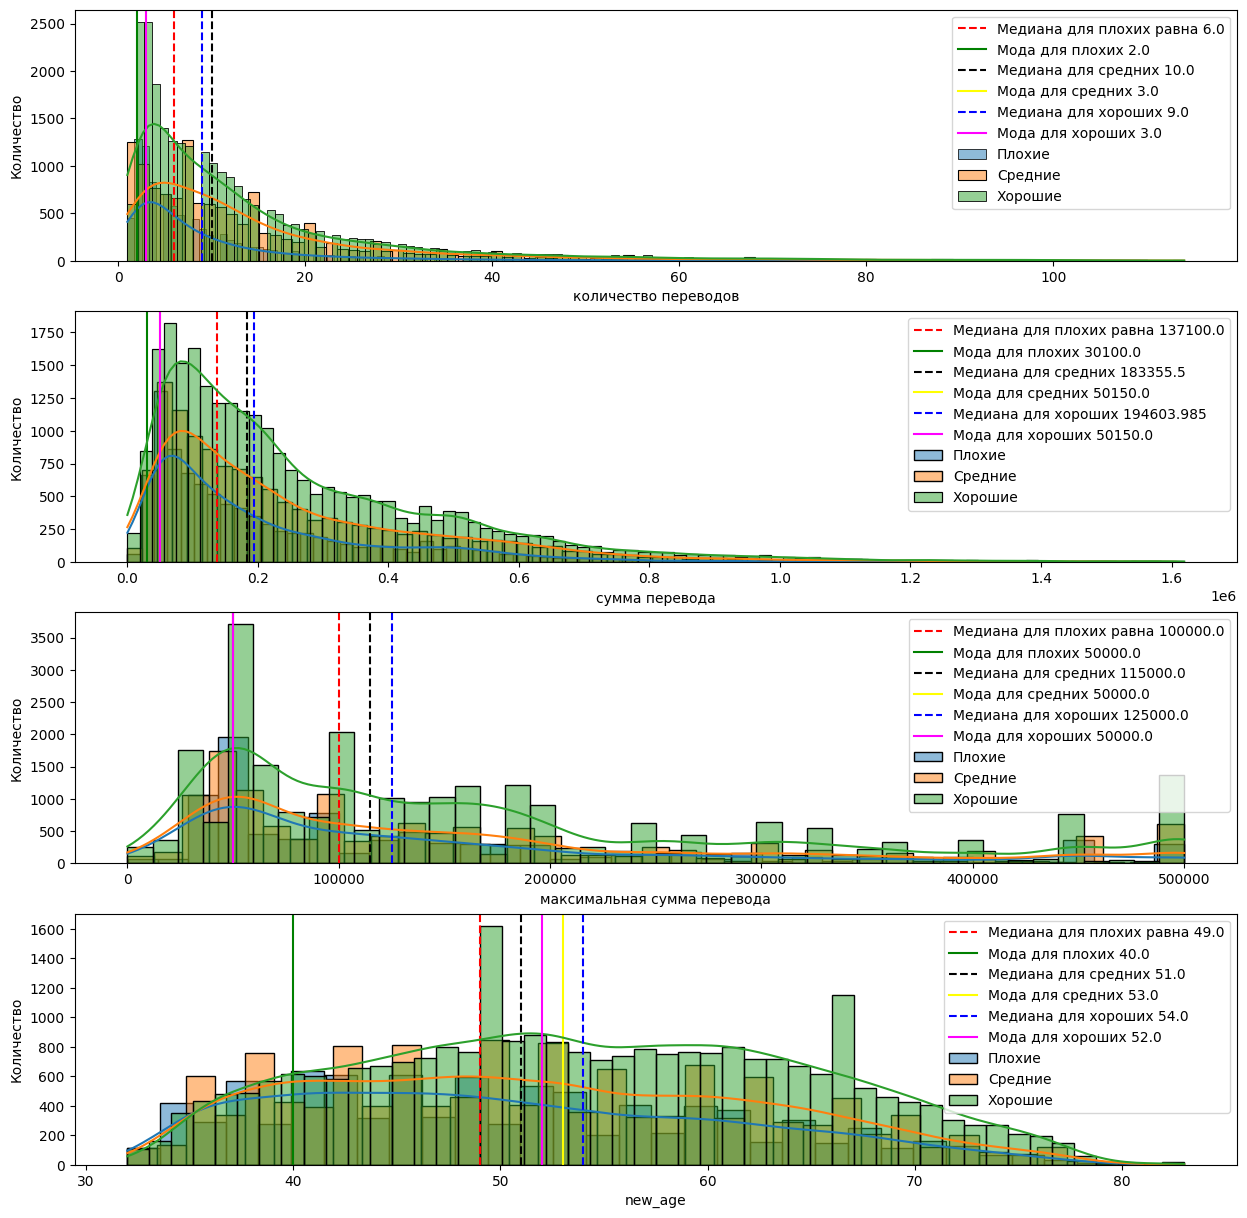

In [60]:
fig, axes = plt.subplots(4, figsize=(15,15))
i=0
vars_cont = set(vars_cont)
vars_cont.add('new_age')
for i, col in enumerate(vars_cont):
    plt.subplot(4,1,i+1)
    ax = sns.histplot(df_no_anomals[df_no_anomals['дисциплина клиента'] == 'BAD'][col]
                      , label = 'Плохие', kde=True)
    med = df_no_anomals[df_no_anomals['дисциплина клиента'] == 'BAD'][col].median()
    mod = df_no_anomals[df_no_anomals['дисциплина клиента'] == 'BAD'][col].mode()[0]
    ax.axvline(med,
               color = 'red',
               label = f'Медиана для плохих равна {med}',
               linestyle = '--')
    ax.axvline(mod, color = 'green', label = f'Мода для плохих {mod}')

    ax = sns.histplot(df_no_anomals[df_no_anomals['дисциплина клиента'] == 'MIDDLE'][col]
                      , label = 'Средние', kde=True)
    med = df_no_anomals[df_no_anomals['дисциплина клиента'] == 'MIDDLE'][col].median()
    mod = df_no_anomals[df_no_anomals['дисциплина клиента'] == 'MIDDLE'][col].mode()[0]
    ax.axvline(med, color = 'black', label = f'Медиана для средних {med}',
               linestyle = '--')
    ax.axvline(mod, color = 'yellow', label = f'Мода для средних {mod}')


    ax = sns.histplot(df_no_anomals[df_no_anomals['дисциплина клиента'] == 'GOOD'][col]
                      , label = 'Хорошие', kde=True)
    med = df_no_anomals[df_no_anomals['дисциплина клиента'] == 'GOOD'][col].median()
    mod = df_no_anomals[df_no_anomals['дисциплина клиента'] == 'GOOD'][col].mode()[0]
    ax.axvline(med, color = 'blue', linestyle = '--', label = f'Медиана для хороших {med}')
    ax.axvline(mod, color = 'magenta', label = f'Мода для хороших {mod}')

    plt.xlabel(col)
    plt.ylabel('Количество')
    plt.legend()

Цели:
- по количеству переводов проверить гипотезу плохие / хороших
- по максимальной сумме проверить гипотезу плохие / средних
- сумма перевода проверить гипотезу плохие / средних


Исследование категориальных признаков

In [61]:
df_no_anomals['оператор связи'].value_counts()

# укрупнение данных
# переименую в "Региональная телекомкомпания" все, кроме {МегаФон, МТС,Вымпел-Коммуникации}

set_to_replace = set(df_no_anomals['оператор связи'].unique()) - set(['МегаФон', 'МТС', 'Вымпел-Коммуникации'])
dict_to_replace = dict.fromkeys(list(set_to_replace), 'Региональная телекомкомпания')

df_no_anomals['оператор связи'].replace(dict_to_replace, inplace = True)

<ipython-input-61-49f5037be399>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_anomals['оператор связи'].replace(dict_to_replace, inplace = True)


In [62]:
df_no_anomals['оператор связи'].value_counts()

МегаФон                         13781
МТС                             13660
Вымпел-Коммуникации             13118
Региональная телекомкомпания     7800
Name: оператор связи, dtype: int64

In [63]:
df_no_anomals['тип переводов'].value_counts()

 2.0     18066
 5.0     13582
 69.0     6469
 6.0      2492
 8.0      1959
 1.0      1624
 10.0     1504
 0.0       709
 12.0      431
 26.0      273
 16.0      199
 37.0      199
 11.0      190
 32.0      163
 45.0      157
 7.0       134
 44.0       61
 58.0       43
 3.0        29
 21.0       14
 28.0       14
 33.0        7
 4.0         5
 29.0        5
 19.0        5
 23.0        4
 17.0        3
 55.0        3
 34.0        2
 53.0        2
 59.0        2
 61.0        2
 54.0        2
 43.0        1
 67.0        1
 30.0        1
-1.0         1
 9.0         1
Name: тип переводов, dtype: int64

In [64]:
# укрупнение в "Другие цели переводов" все, кроме [2,5,69,6,8,1,10]

set_to_replace = set(df_no_anomals['тип переводов'].unique()) - set([2,5,69,6,8,1,10])
dict_to_replace = dict.fromkeys(list(set_to_replace), 'Другие цели переводов')

df_no_anomals['тип переводов'].replace(dict_to_replace, inplace = True)

<ipython-input-64-0a0165dd4cb2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_anomals['тип переводов'].replace(dict_to_replace, inplace = True)


In [65]:
df_no_anomals['тип переводов'].value_counts()

2.0                      18066
5.0                      13582
69.0                      6469
Другие цели переводов     2663
6.0                       2492
8.0                       1959
1.0                       1624
10.0                      1504
Name: тип переводов, dtype: int64

In [66]:
df_no_anomals.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48359 entries, 0 to 49774
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   идентификатор                48359 non-null  int64         
 1   дата рождения                48359 non-null  datetime64[ns]
 2   дисциплина клиента           48359 non-null  object        
 3   количество переводов         48359 non-null  float64       
 4   тип переводов                48359 non-null  object        
 5   география переводов          48359 non-null  object        
 6   география телефона           48359 non-null  object        
 7   сумма перевода               48359 non-null  float64       
 8   максимальная сумма перевода  48359 non-null  float64       
 9   средняя сумма перевода       48359 non-null  float64       
 10  канал клиента                48359 non-null  object        
 11  оператор связи               48359 non-nu

In [67]:
vars_cat = ['дисциплина клиента', 'география переводов', 'география телефона',
            'канал клиента', 'оператор связи', 'пол', 'тип переводов']

In [68]:
# перевод из родного и чужого региона

df_no_anomals['откуда_перевод'] = np.where(df_no_anomals['география переводов'] == df_no_anomals['география телефона'],
                                           'из родного региона',
                                           'из чужого региона')

df_no_anomals['откуда_перевод'].value_counts()

<ipython-input-68-d1b7dcfa857e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_anomals['откуда_перевод'] = np.where(df_no_anomals['география переводов'] == df_no_anomals['география телефона'],


из родного региона    39743
из чужого региона      8616
Name: откуда_перевод, dtype: int64

In [69]:
vars_cat

['дисциплина клиента',
 'география переводов',
 'география телефона',
 'канал клиента',
 'оператор связи',
 'пол',
 'тип переводов']

In [70]:
df_no_anomals.head()

,идентификатор,дата рождения,дисциплина клиента,количество переводов,тип переводов,география переводов,география телефона,сумма перевода,максимальная сумма перевода,средняя сумма перевода,канал клиента,оператор связи,пол,new_age,откуда_перевод
0,1493553,1981-05-08,BAD,17.0,2.0,77.0,77.0,371600.00,265000.0,21858.8235,Стойка,Региональная телекомкомпания,Ж,42.0,из родного региона
1,8130758,1979-03-06,BAD,4.0,2.0,77.0,77.0,137574.00,135000.0,34393.5000,Стойка,Региональная телекомкомпания,М,44.0,из родного региона
2,1782539,1957-04-29,BAD,3.0,2.0,77.0,77.0,175150.00,135000.0,58383.3333,Стойка,МегаФон,М,66.0,из родного региона
3,12410720,1977-08-05,BAD,3.0,2.0,77.0,77.0,50250.00,50000.0,16750.0000,Стойка,Региональная телекомкомпания,М,46.0,из родного региона
4,21309736,1978-08-15,GOOD,5.0,69.0,77.0,77.0,215920.14,135000.0,43184.0280,Стойка,Региональная телекомкомпания,М,45.0,из родного региона


In [71]:
# рассчитала доли по признаку

columns = ['канал клиента', 'оператор связи',
           'пол', 'тип переводов',
           'откуда_перевод']

for col in columns:
    df_pt_canal = pd.pivot_table(data = df_no_anomals,
                                 index = 'дисциплина клиента',
                                 columns = col,
                                 values = 'идентификатор',
                                 aggfunc = 'count')

    # нормирование показателей
    print(f'---{col}---')
    print(np.round(df_pt_canal / df_pt_canal.sum() * 100,2))
    print()

# сравнение на глаз

---канал клиента---
канал клиента        Офис  Партнер  Стойка
дисциплина клиента                        
BAD                 14.91    22.76   21.90
GOOD                59.41    48.27   50.44
MIDDLE              25.68    28.96   27.65

---оператор связи---
оператор связи      Вымпел-Коммуникации    МТС  МегаФон  \
дисциплина клиента                                        
BAD                               18.24  17.12    16.86   
GOOD                              54.45  55.64    54.85   
MIDDLE                            27.31  27.24    28.29   

оператор связи      Региональная телекомкомпания  
дисциплина клиента                                
BAD                                        25.91  
GOOD                                       48.95  
MIDDLE                                     25.14  

---пол---
пол                     Ж      М
дисциплина клиента              
BAD                 17.88  19.69
GOOD                54.90  53.09
MIDDLE              27.22  27.22

---тип переводо

In [72]:
df_pt_canal

откуда_перевод,из родного региона,из чужого региона
дисциплина клиента,,
BAD,7096,1981
GOOD,21542,4578
MIDDLE,11105,2057


In [73]:
df_pt_canal.sum()

откуда_перевод
из родного региона    39743
из чужого региона      8616
dtype: int64

**Гипотезы**

1. канал, оператор связи, типы переводов, откуда перевод

In [74]:
df_no_anomals.head(5)

,идентификатор,дата рождения,дисциплина клиента,количество переводов,тип переводов,география переводов,география телефона,сумма перевода,максимальная сумма перевода,средняя сумма перевода,канал клиента,оператор связи,пол,new_age,откуда_перевод
0,1493553,1981-05-08,BAD,17.0,2.0,77.0,77.0,371600.00,265000.0,21858.8235,Стойка,Региональная телекомкомпания,Ж,42.0,из родного региона
1,8130758,1979-03-06,BAD,4.0,2.0,77.0,77.0,137574.00,135000.0,34393.5000,Стойка,Региональная телекомкомпания,М,44.0,из родного региона
2,1782539,1957-04-29,BAD,3.0,2.0,77.0,77.0,175150.00,135000.0,58383.3333,Стойка,МегаФон,М,66.0,из родного региона
3,12410720,1977-08-05,BAD,3.0,2.0,77.0,77.0,50250.00,50000.0,16750.0000,Стойка,Региональная телекомкомпания,М,46.0,из родного региона
4,21309736,1978-08-15,GOOD,5.0,69.0,77.0,77.0,215920.14,135000.0,43184.0280,Стойка,Региональная телекомкомпания,М,45.0,из родного региона


In [75]:
def float_to_str(x):
    return str(x)

In [76]:
df_no_anomals['тип переводов'] = df_no_anomals['тип переводов'].apply(float_to_str)

<ipython-input-76-d6fd95754d83>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_anomals['тип переводов'] = df_no_anomals['тип переводов'].apply(float_to_str)


In [77]:
df_copy = df_no_anomals.drop(columns=['идентификатор', 'дата рождения']).copy()

In [78]:
# рассчет коэффициентов корреляции и определение связи между признаками

columns = ['откуда_перевод', 'пол', 'оператор связи',
           'канал клиента', 'тип переводов', 'дисциплина клиента']
from sklearn.preprocessing import LabelEncoder

for col in columns:
    le = LabelEncoder()
    df_copy[col] = le.fit_transform(df_copy[col])

In [79]:
df_copy.corr()

<ipython-input-79-df6bdacf2157>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_copy.corr()


,дисциплина клиента,количество переводов,тип переводов,сумма перевода,максимальная сумма перевода,средняя сумма перевода,канал клиента,оператор связи,пол,new_age,откуда_перевод
дисциплина клиента,1.000000,0.107701,-0.013658,0.069543,0.021541,-0.055030,-0.032225,-0.032664,-0.013431,0.025966,-0.052350
количество переводов,0.107701,1.000000,-0.017288,0.458805,0.106655,-0.319365,0.042478,-0.023094,-0.018826,0.091810,-0.155289
тип переводов,-0.013658,-0.017288,1.000000,0.020763,-0.005776,0.041818,-0.124864,0.019100,-0.050569,0.024134,0.050164
сумма перевода,0.069543,0.458805,0.020763,1.000000,0.785712,0.305208,0.019521,-0.038774,0.061867,0.048161,-0.116117
максимальная сумма перевода,0.021541,0.106655,-0.005776,0.785712,1.000000,0.554932,-0.026263,-0.042215,0.061791,0.043590,-0.069725
средняя сумма перевода,-0.055030,-0.319365,0.041818,0.305208,0.554932,1.000000,-0.085826,-0.015997,0.053090,-0.016829,0.131401
канал клиента,-0.032225,0.042478,-0.124864,0.019521,-0.026263,-0.085826,1.000000,0.040601,-0.045677,0.032467,-0.041509
оператор связи,-0.032664,-0.023094,0.019100,-0.038774,-0.042215,-0.015997,0.040601,1.000000,-0.014362,-0.048326,0.052809
пол,-0.013431,-0.018826,-0.050569,0.061867,0.061791,0.053090,-0.045677,-0.014362,1.000000,-0.136507,-0.003823
new_age,0.025966,0.091810,0.024134,0.048161,0.043590,-0.016829,0.032467,-0.048326,-0.136507,1.000000,-0.028756


<ipython-input-80-40f604450b3e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(data = df_copy.corr(), annot=True, square=True,
<ipython-input-80-40f604450b3e>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  linecolor='black', mask=np.triu(df_copy.corr()))


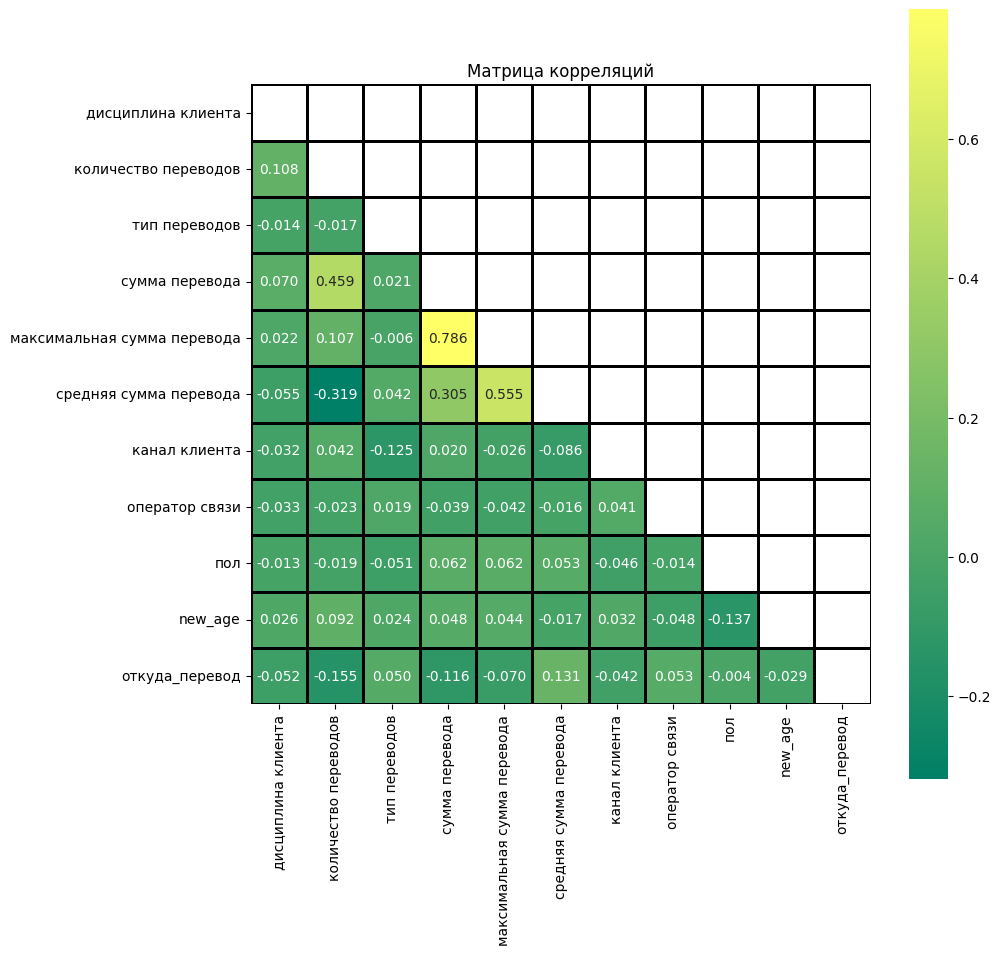

In [80]:
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(data = df_copy.corr(), annot=True, square=True,
                 cmap='summer', fmt='.3f', linewidths=1,
                 linecolor='black', mask=np.triu(df_copy.corr()))
plt.title('Матрица корреляций')
plt.show()

Признаки, по которым составляется портрет клиента:
- количество переводов,
- сумма перевода,
- откуда перевод,
- оператор связи,
- канал.


**Проверка гипотез**

In [82]:
# для непрерывного (числового признака)
# - по количеству переводов проверить гипотезу плохие / хороших
# - сумма перевода проверить гипотезу плохие / средних

# формируем выборки
X = df_no_anomals[df_no_anomals['дисциплина клиента'] == 'BAD']['количество переводов']
Y = df_no_anomals[df_no_anomals['дисциплина клиента'] == 'GOOD']['количество переводов']

# проверяем нормальность распределения
from scipy.stats import kstest
print(
    kstest(X, 'norm',
       args=(X.mean(), X.std()))
    )

# т.к. 0 = p_value < alpha = 0.05, то гипотезу о нормальном законе распределения X отвергаем

# проряем гипотезу в отношении параметров -- медиана
# H_0: количество переводов клиентов с дисциплиной <<BAD>> не отличается
# от количества переводов клиентов с дисциплиной <<GOOD>>
# H_1: количество переводов клиентов с дисциплиной <<BAD>> меньше
# количества переводов с клиентов дисциплиной <<GOOD>>

from scipy.stats import mannwhitneyu
from scipy.stats import kruskal

mannwhitneyu(X,Y, alternative = 'less')
# т.к. 2.947261207847815e-205 = p_value < alpha = 0.05, то гипотезу о равенстве отвергаем

kruskal(X,Y)

KstestResult(statistic=0.23914275562580206, pvalue=0.0, statistic_location=1.0, statistic_sign=-1)


KruskalResult(statistic=933.2195172702383, pvalue=5.894414132033649e-205)

Проверка гипотез:
- откуда_перевод,
- оператор связи,
- канал

In [83]:
df_no_anomals.columns

Index(['идентификатор', 'дата рождения', 'дисциплина клиента',
       'количество переводов', 'тип переводов', 'география переводов',
       'география телефона', 'сумма перевода', 'максимальная сумма перевода',
       'средняя сумма перевода', 'канал клиента', 'оператор связи', 'пол',
       'new_age', 'откуда_перевод'],
      dtype='object')

In [85]:
df_pt_canal = pd.pivot_table(data = df_no_anomals,
               index = 'дисциплина клиента',
               columns = 'канал клиента',
               values = 'идентификатор',
               aggfunc = 'count')

df_pt_canal

канал клиента,Офис,Партнер,Стойка
дисциплина клиента,,,
BAD,3597,4589,891
GOOD,14336,9732,2052
MIDDLE,6198,5839,1125


In [86]:
np.round(df_pt_canal / df_pt_canal.sum() * 100,2)

канал клиента,Офис,Партнер,Стойка
дисциплина клиента,,,
BAD,14.91,22.76,21.90
GOOD,59.41,48.27,50.44
MIDDLE,25.68,28.96,27.65


Для биномиальных распределений

$$
\begin{multline*}
z = \dfrac{\dfrac{m_1}{n_1}+ \dfrac{1}{2n_1} - \dfrac{m_2}{n_2} - \dfrac{1}{2n_2}}{\sqrt{\dfrac{m_1+m_2}{n_1+n_2} \dfrac{n_1+n_2 - m_1 - m_2}{n_1+n_2}\left(\dfrac{1}{n_1}+\dfrac{1}{n_2}\right)}} = \\
= \dfrac{\dfrac{m_1}{n_1}- \dfrac{m_2}{n_2} + \dfrac{1}{2n_1} - \dfrac{1}{2n_2}}{\sqrt{\dfrac{m_1+m_2}{n_1+n_2} \left( 1-\dfrac{m_1+m_2}{n_1+n_2}\right)\left(\dfrac{1}{n_1}+\dfrac{1}{n_2}\right)}}
\end{multline*}
$$

ОФИС(n1)| Плохие (m1) vs  (Партнер + Стойку)(n2)/плохие(m2)

In [87]:
df_no_anomals.columns

Index(['идентификатор', 'дата рождения', 'дисциплина клиента',
       'количество переводов', 'тип переводов', 'география переводов',
       'география телефона', 'сумма перевода', 'максимальная сумма перевода',
       'средняя сумма перевода', 'канал клиента', 'оператор связи', 'пол',
       'new_age', 'откуда_перевод'],
      dtype='object')

In [88]:
#для биноминальных распределений
n1 = df_no_anomals[df_no_anomals['канал клиента'] == 'Офис'].shape[0]
n2 = df_no_anomals[df_no_anomals['канал клиента'].isin(['Партнер', 'Стойка'])].shape[0]
m1 = df_no_anomals[(df_no_anomals['канал клиента'] == 'Офис')
                    & (df_no_anomals['дисциплина клиента'] == 'BAD')].shape[0]

m2 = df_no_anomals[(df_no_anomals['канал клиента'].isin(['Партнер', 'Стойка']))
                       & (df_no_anomals['дисциплина клиента'] == 'BAD')].shape[0]

def test_z_criterion(n1, n2, m1, m2, alpha=0.05):
    import scipy.stats as st
    import math
    z_value = (m1/n1 - m2/n2) / math.sqrt(((m1+m2)/(n1+n2))*(1-((m1+m2)/(n1+n2)))*(1/n1+1/n2))
    distr = st.norm(0, 1)
    p_value = (1 - distr.cdf(abs(z_value))) * 2 #1-F(z_value)
    print('Результаты проверки гипотезы H_0 по z-критерию:')
    print('Уровень значимости alpha={:.2f}'.format(alpha))
    print('P-value: {:.2f}'.format(p_value))
    if p_value < alpha:
        print(f"""Отвергаем нулевую гипотезу: разница в долях статистически значима.""")
    else: print(f"""Не получилось отвергнуть нулевую гипотезу: разница в долях статистически незначима.""")
    print('------------------------------------------------------------')

In [89]:
test_z_criterion(n1, n2, m1, m2)

Результаты проверки гипотезы H_0 по z-критерию:
Уровень значимости alpha=0.05
P-value: 0.00
Отвергаем нулевую гипотезу: разница в долях статистически значима.
------------------------------------------------------------


**Выводы**

- Основные операторы связи, которые совершают переводы из категории 'GOOD';
- Количество переводов - это значимый признак в отношении "Дисциплина клиента";
- Клиент, совершающий не более 6 переводов, с высокой долей вероятности относится к 'BAD', а 6 и более переводов- к 'GOOD';
- Большинство клиентов не совершает большое количество переводов;
- Существует разница в возрасте между показателями целевого признака;
- Высокий процент клиентов 'BAD' пришел через каналы: 'Партнер' и 'Стойка';
- Небольшой процент клиентов 'BAD' пришел через канал 'Офис';
- Больинство клиентов 'GOOD' пришли через канал 'Офис';
- Больинство клиентов 'MIDDLE' пришли через канал 'Офис' и т.д.
